In [ ]:
!nvidia-smi

Tue Jun 11 18:20:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -q roboflow
!pip install -q git+https://github.com/roboflow/supervision.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("work-space-isqxc").project("auto-pharmacy")
version = project.version(5)
dataset = version.download("paligemma")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FFCtwo-1 in paligemma:: 100%|██████████| 2395/2395 [00:00<00:00, 4168.85it/s]


In [ ]:
!head -n 5 {dataset.location}/dataset/_annotations.train.jsonl

{"image":"img_2541_jpeg.rf.00fea8426111c4301e4eed31c6eed873.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0491><loc0000><loc0881><loc0755> kiwi ; <loc0059><loc0000><loc0481><loc0340> kiwi ; <loc0064><loc0340><loc0522><loc1023> kiwi"}
{"image":"img_1531_jpeg.rf.00b84f52073563443c0d74e2e6788443.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0040><loc0117><loc0972><loc0800> avocado"}
{"image":"img_4601_jpeg.rf.01011d07b50e7efde48f39057ed1e82d.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0158><loc0038><loc0771><loc0990> semangka"}
{"image":"img_1341_jpeg.rf.0139ddb058f3f9fca66840f2b2cb7109.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0112><loc0160><loc076

In [ ]:
!head -n 5 {dataset.location}/dataset/_annotations.valid.jsonl

{"image":"img_1251_jpeg.rf.018d36f2118b3774fcf390c5d97a8566.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0026><loc0198><loc0881><loc0825> jeruk"}
{"image":"img_1071_jpeg.rf.025e0bca17aca7d8ea63accb5c4db245.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0342><loc0081><loc0678><loc0948> nanas"}
{"image":"img_2691_jpeg.rf.05e4e3fe98d13ec4a6cdce4c405a50dc.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0106><loc0540><loc0967><loc0985> ceri"}
{"image":"img_1251_jpeg.rf.060fefbe4c8ee97df3e221cf4905e623.jpg","prefix":"detect apel ; apple ; avocado ; ceri ; jeruk ; kiwi ; mangga ; nanas ; pisang ; semangka ; strawbery","suffix":"<loc0026><loc0422><loc0596><loc0823> mangga"}
{"image":"img_1321_jpeg.rf.06079642f4ee53bff9ccde438ba99378.jpg","prefix

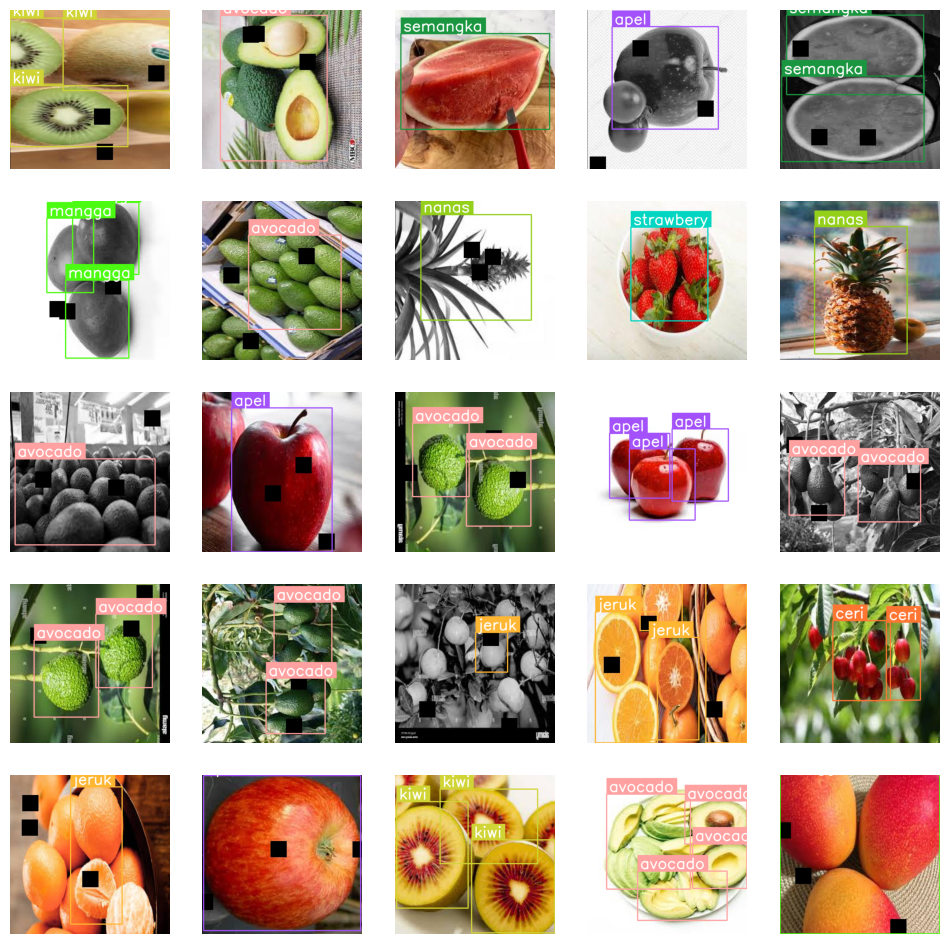

In [ ]:
#Displaying training images and their objects

import cv2
import json
import supervision as sv
from typing import List

def read_n_lines(file_path: str, n: int) -> List[str]:
    with open(file_path, 'r') as file:
        lines = [next(file).strip() for _ in range(n)]
    return lines

images = []
lines = read_n_lines(f"{dataset.location}/dataset/_annotations.train.jsonl", 25)
first = json.loads(lines[0])

CLASSES = first.get('prefix').replace("detect ", "").split(" ; ")

for line in lines:
    data = json.loads(line)
    image = cv2.imread(f"{dataset.location}/dataset/{data.get('image')}")
    (h, w, _) = image.shape
    detections = sv.Detections.from_lmm(
        lmm='paligemma',
        result=data.get('suffix'),
        resolution_wh=(w, h),
        classes=CLASSES)

    image = sv.BoundingBoxAnnotator(thickness=4).annotate(image, detections)
    image = sv.LabelAnnotator(text_scale=2, text_thickness=4).annotate(image, detections)
    images.append(image)

sv.plot_images_grid(images, (5, 5))

In [ ]:
CLASSES

['apel',
 'apple',
 'avocado',
 'ceri',
 'jeruk',
 'kiwi',
 'mangga',
 'nanas',
 'pisang',
 'semangka',
 'strawbery']

In [ ]:
import os
import sys

# TPUs with
if "COLAB_TPU_ADDR" in os.environ:
  raise "It seems you are using Colab with remote TPUs which is not supported."

# Fetch big_vision repository if python doesn't know about it and install
# dependencies needed for this notebook.
if not os.path.exists("big_vision_repo"):
  !git clone --quiet --branch=main --depth=1 \
     https://github.com/google-research/big_vision big_vision_repo

# Append big_vision code to python import path
if "big_vision_repo" not in sys.path:
  sys.path.append("big_vision_repo")

# Install missing dependencies. Assume jax~=0.4.25 with GPU available.
!pip3 install -q "overrides" "ml_collections" "einops~=0.7" "sentencepiece"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.1 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata

# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate or make your credentials available in ~/.kaggle/kaggle.json

os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

In [ ]:
import base64
import functools
import html
import io
import os
import warnings

import jax
import jax.numpy as jnp
import numpy as np
import ml_collections

import tensorflow as tf
import sentencepiece

from IPython.core.display import display, HTML
from PIL import Image
from tqdm.notebook import tqdm

# Import model definition from big_vision
from big_vision.models.proj.paligemma import paligemma
from big_vision.trainers.proj.paligemma import predict_fns

# Import big vision utilities
import big_vision.datasets.jsonl
import big_vision.utils
import big_vision.sharding

# Don't let TF use the GPU or TPUs
tf.config.set_visible_devices([], "GPU")
tf.config.set_visible_devices([], "TPU")

backend = jax.lib.xla_bridge.get_backend()
print(f"JAX version:  {jax.__version__}")
print(f"JAX platform: {backend.platform}")
print(f"JAX devices:  {jax.device_count()}")

JAX version:  0.4.26
JAX platform: gpu
JAX devices:  1


In [ ]:
import os
import kagglehub

MODEL_PATH = "./pt_224_128.params.f16.npz"
if not os.path.exists(MODEL_PATH):
    print("Downloading the checkpoint from Kaggle, this could take a few minutes....")
    # Note: kaggle archive contains the same checkpoint in multiple formats.
    # Download only the float16 model.
    MODEL_PATH = kagglehub.model_download('google/paligemma/jax/paligemma-3b-pt-224', 'paligemma-3b-pt-224.f16.npz')
    print(f"Model path: {MODEL_PATH}")

TOKENIZER_PATH = "./paligemma_tokenizer.model"
if not os.path.exists(TOKENIZER_PATH):
    print("Downloading the model tokenizer...")
    !gsutil cp gs://big_vision/paligemma_tokenizer.model {TOKENIZER_PATH}
    print(f"Tokenizer path: {TOKENIZER_PATH}")

100%|██████████| 5.45G/5.45G [02:05<00:00, 46.6MB/s]


Model path: /root/.cache/kagglehub/models/google/paligemma/jax/paligemma-3b-pt-224/1/paligemma-3b-pt-224.f16.npz
Copying gs://big_vision/paligemma_tokenizer.model...
- [1 files][  4.1 MiB/  4.1 MiB]                                                
Operation completed over 1 objects/4.1 MiB.                                      
Tokenizer path: ./paligemma_tokenizer.model


In [ ]:
# Define model
model_config = ml_collections.FrozenConfigDict({
    "llm": {"vocab_size": 257_152},
    "img": {"variant": "So400m/14", "pool_type": "none", "scan": True, "dtype_mm": "float16"}
})
model = paligemma.Model(**model_config)
tokenizer = sentencepiece.SentencePieceProcessor(TOKENIZER_PATH)

# Load params - this can take up to 1 minute in T4 colabs.
params = paligemma.load(None, MODEL_PATH, model_config)

# Define `decode` function to sample outputs from the model.
decode_fn = predict_fns.get_all(model)['decode']
decode = functools.partial(decode_fn, devices=jax.devices(), eos_token=tokenizer.eos_id())

In [ ]:
# Create a pytree mask of the trainable params.
def is_trainable_param(name, param):  # pylint: disable=unused-argument
  if name.startswith("llm/layers/attn/"):  return True
  if name.startswith("llm/"):              return False
  if name.startswith("img/"):              return False
  raise ValueError(f"Unexpected param name {name}")
trainable_mask = big_vision.utils.tree_map_with_names(is_trainable_param, params)

# If more than one device is available (e.g. multiple GPUs) the parameters can
# be sharded across them to reduce HBM usage per device.
mesh = jax.sharding.Mesh(jax.devices(), ("data"))

data_sharding = jax.sharding.NamedSharding(
    mesh, jax.sharding.PartitionSpec("data"))

params_sharding = big_vision.sharding.infer_sharding(
    params, strategy=[('.*', 'fsdp(axis="data")')], mesh=mesh)

# Yes: Some donated buffers are not usable.
warnings.filterwarnings(
    "ignore", message="Some donated buffers were not usable")

@functools.partial(jax.jit, donate_argnums=(0,), static_argnums=(1,))
def maybe_cast_to_f32(params, trainable):
  return jax.tree.map(lambda p, m: p.astype(jnp.float32) if m else p,
                      params, trainable)

# Loading all params in simultaneous - albeit much faster and more succinct -
# requires more RAM than the T4 colab runtimes have by default.
# Instead we do it param by param.
params, treedef = jax.tree.flatten(params)
sharding_leaves = jax.tree.leaves(params_sharding)
trainable_leaves = jax.tree.leaves(trainable_mask)
for idx, (sharding, trainable) in enumerate(zip(sharding_leaves, trainable_leaves)):
  params[idx] = big_vision.utils.reshard(params[idx], sharding)
  params[idx] = maybe_cast_to_f32(params[idx], trainable)
  params[idx].block_until_ready()
params = jax.tree.unflatten(treedef, params)

# Print params to show what the model is made of.
def parameter_overview(params):
  for path, arr in big_vision.utils.tree_flatten_with_names(params)[0]:
    print(f"{path:80s} {str(arr.shape):22s} {arr.dtype}")

print(" == Model params == ")
parameter_overview(params)

 == Model params == 
img/Transformer/encoder_norm/bias                                                (1152,)                float16
img/Transformer/encoder_norm/scale                                               (1152,)                float16
img/Transformer/encoderblock/LayerNorm_0/bias                                    (27, 1152)             float16
img/Transformer/encoderblock/LayerNorm_0/scale                                   (27, 1152)             float16
img/Transformer/encoderblock/LayerNorm_1/bias                                    (27, 1152)             float16
img/Transformer/encoderblock/LayerNorm_1/scale                                   (27, 1152)             float16
img/Transformer/encoderblock/MlpBlock_0/Dense_0/bias                             (27, 4304)             float16
img/Transformer/encoderblock/MlpBlock_0/Dense_0/kernel                           (27, 1152, 4304)       float16
img/Transformer/encoderblock/MlpBlock_0/Dense_1/bias                             (2

In [ ]:
def preprocess_image(image, size=224):
  # Model has been trained to handle images of different aspects ratios
  # resized to 224x224 in the range [-1, 1]. Bilinear and antialias resize
  # options are helpful to improve quality in some tasks.
  image = np.asarray(image)
  if image.ndim == 2:  # Convert image without last channel into greyscale.
    image = np.stack((image,)*3, axis=-1)
  image = image[..., :3]  # Remove alpha layer.
  assert image.shape[-1] == 3

  image = tf.constant(image)
  image = tf.image.resize(image, (size, size), method='bilinear', antialias=True)
  return image.numpy() / 127.5 - 1.0  # [0, 255]->[-1,1]

def preprocess_tokens(prefix, suffix=None, seqlen=None):
  # Model has been trained to handle tokenized text composed of a prefix with
  # full attention and a suffix with causal attention.
  separator = "\n"
  tokens = tokenizer.encode(prefix, add_bos=True) + tokenizer.encode(separator)
  mask_ar = [0] * len(tokens)    # 0 to use full attention for prefix.
  mask_loss = [0] * len(tokens)  # 0 to not use prefix tokens in the loss.

  if suffix:
    suffix = tokenizer.encode(suffix, add_eos=True)
    tokens += suffix
    mask_ar += [1] * len(suffix)    # 1 to use causal attention for suffix.
    mask_loss += [1] * len(suffix)  # 1 to use suffix tokens in the loss.

  mask_input = [1] * len(tokens)    # 1 if it's a token, 0 if padding.
  if seqlen:
    padding = [0] * max(0, seqlen - len(tokens))
    tokens = tokens[:seqlen] + padding
    mask_ar = mask_ar[:seqlen] + padding
    mask_loss = mask_loss[:seqlen] + padding
    mask_input = mask_input[:seqlen] + padding

  return jax.tree.map(np.array, (tokens, mask_ar, mask_loss, mask_input))

def postprocess_tokens(tokens):
  tokens = tokens.tolist()  # np.array to list[int]
  try:  # Remove tokens at and after EOS if any.
    eos_pos = tokens.index(tokenizer.eos_id())
    tokens = tokens[:eos_pos]
  except ValueError:
    pass
  return tokenizer.decode(tokens)

In [ ]:
SEQLEN = 128

train_dataset = big_vision.datasets.jsonl.DataSource(
    os.path.join(dataset.location, "dataset/_annotations.train.jsonl"),
    fopen_keys={"image": f"{dataset.location}/dataset"})

val_dataset = big_vision.datasets.jsonl.DataSource(
    os.path.join(dataset.location, "dataset/_annotations.valid.jsonl"),
    fopen_keys={"image": f"{dataset.location}/dataset"})


def train_data_iterator():
  """Never ending iterator over training examples."""
  # Shuffle examples and repeat so one can train for many epochs.
  dataset = train_dataset.get_tfdata().shuffle(1_000).repeat()
  for example in dataset.as_numpy_iterator():
    image = Image.open(io.BytesIO(example["image"]))
    image = preprocess_image(image)

    prefix = example["prefix"].decode().lower()
    suffix = example["suffix"].decode().lower()
    tokens, mask_ar, mask_loss, _ = preprocess_tokens(prefix, suffix, SEQLEN)
    label, _, _, _ = preprocess_tokens(suffix, seqlen=SEQLEN)

    yield {
        "image": np.asarray(image),
        "text": np.asarray(tokens),
        "label": np.asarray(label),
        "mask_ar": np.asarray(mask_ar),
        "mask_loss": np.asarray(mask_loss),
    }


def validation_data_iterator():
  """Single iterator over validation examples."""
  for example in val_dataset.get_tfdata(ordered=True).as_numpy_iterator():
    image = Image.open(io.BytesIO(example["image"]))
    image = preprocess_image(image)

    prefix = example["prefix"].decode().lower()
    suffix = example["suffix"].decode().lower()
    tokens, mask_ar, _, mask_input = preprocess_tokens(prefix, seqlen=SEQLEN)
    label, _, _, _ = preprocess_tokens(suffix, seqlen=SEQLEN)

    yield {
        "image": np.asarray(image),
        "text": np.asarray(tokens),
        "label": np.asarray(label),
        "mask_ar": np.asarray(mask_ar),
        "mask_input": np.asarray(mask_input),
    }


Training examples



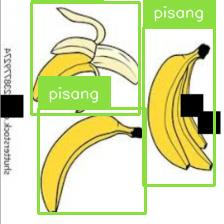
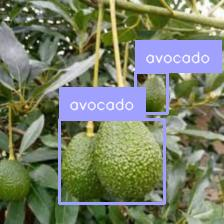
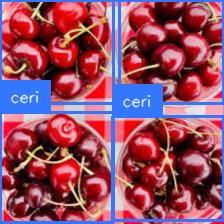
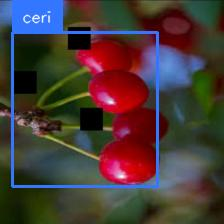

In [ ]:
def split_and_keep_second_part(s):
    parts = s.split('\n', 1)
    if len(parts) > 1:
        return parts[1]
    return s

def render_inline(image, resize=(128, 128)):
    """Convert image into inline html."""
    image = Image.fromarray(image)
    image.resize(resize)
    with io.BytesIO() as buffer:
        image.save(buffer, format='jpeg')
        image_b64 = str(base64.b64encode(buffer.getvalue()), "utf-8")
        return f"data:image/jpeg;base64,{image_b64}"

def render_example(image, caption):
    image = ((image + 1)/2 * 255).astype(np.uint8)  # [-1,1] -> [0, 255]
    h, w, _ = image.shape
    try:
        detections = sv.Detections.from_lmm(
            lmm='paligemma',
            result=caption,
            resolution_wh=(w, h),
            classes=CLASSES)
        image = sv.BoundingBoxAnnotator().annotate(image, detections)
        image = sv.LabelAnnotator().annotate(image, detections)
    except:
        print(caption)
    return f"""
<div style="display: inline-flex; align-items: center; justify-content: center;">
    <img style="width:128px; height:128px;" src="{render_inline(image, resize=(64,64))}" />
    <p style="width:256px; margin:10px; font-size:small;">{html.escape(caption)}</p>
</div>
"""

html_out = ""
for idx, example in zip(range(4), train_data_iterator()):
    caption = postprocess_tokens(example["text"])  # detokenize model input.
    caption = split_and_keep_second_part(caption)
    html_out += render_example(example["image"], caption)

print("Training examples")
display(HTML(html_out))

In [ ]:
# The main update_fn using a simple stochastic gradient descent (SGD).
@functools.partial(jax.jit, donate_argnums=(0,))
def update_fn(params, batch, learning_rate):
  imgs, txts, mask_ar = batch["image"], batch["text"], batch["mask_ar"]

  def loss_fn(params):
    text_logits, _ = model.apply({"params": params}, imgs, txts[:, :-1], mask_ar[:, :-1], train=True)
    logp = jax.nn.log_softmax(text_logits, axis=-1)

    # The model takes as input txts[:, :-1] but the loss is defined as predicting
    # next tokens txts[:, 1:]. Additionally, mask_loss[:, 1:] indicates which tokens
    # are part of the loss (e.g. prefix and padded tokens are not included).
    mask_loss = batch["mask_loss"][:, 1:]
    targets = jax.nn.one_hot(txts[:, 1:], text_logits.shape[-1])

    # Compute the loss per example. i.e. the mean of per token pplx.
    # Since each example has a different number of tokens we normalize it.
    token_pplx = jnp.sum(logp * targets, axis=-1)  # sum across vocab_size.
    example_loss = -jnp.sum(token_pplx * mask_loss, axis=-1)  # sum across seq_len.
    example_loss /= jnp.clip(jnp.sum(mask_loss, -1), 1)  # weight by num of tokens.

    # batch_loss: mean of per example loss.
    return jnp.mean(example_loss)

  loss, grads = jax.value_and_grad(loss_fn)(params)

  # Apply gradients to trainable params using SGD.
  def apply_grad(param, gradient, trainable):
    if not trainable: return param
    return param - learning_rate * gradient

  params = jax.tree_util.tree_map(apply_grad, params, grads, trainable_mask)

  return params, loss

# Evaluation/inference loop.
def make_predictions(data_iterator, *, num_examples=None,
                     batch_size=4, seqlen=SEQLEN, sampler="greedy"):
  outputs = []
  while True:
    # Construct a list of examples in the batch.
    examples = []
    try:
      for _ in range(batch_size):
        examples.append(next(data_iterator))
        examples[-1]["_mask"] = np.array(True)  # Indicates true example.
    except StopIteration:
      if len(examples) == 0:
        return outputs

    # Not enough examples to complete a batch. Pad by repeating last example.
    while len(examples) % batch_size:
      examples.append(dict(examples[-1]))
      examples[-1]["_mask"] = np.array(False)  # Indicates padding example.

    # Convert list of examples into a dict of np.arrays and load onto devices.
    batch = jax.tree.map(lambda *x: np.stack(x), *examples)
    batch = big_vision.utils.reshard(batch, data_sharding)

    # Make model predictions
    tokens = decode({"params": params}, batch=batch,
                    max_decode_len=seqlen, sampler=sampler)

    # Fetch model predictions to device and detokenize.
    tokens, mask = jax.device_get((tokens, batch["_mask"]))
    tokens = tokens[mask]  # remove padding examples.
    labels = [postprocess_tokens(e["label"]) for e in examples]
    responses = [postprocess_tokens(t) for t in tokens]

    # Append to html output.
    for example, label, response in zip(examples, labels, responses):
      outputs.append((example["image"], label, response))
      if num_examples and len(outputs) >= num_examples:
        return outputs


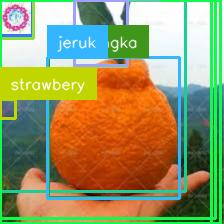
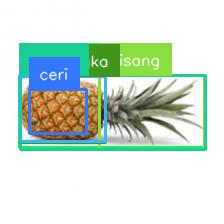
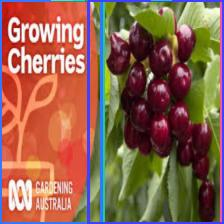
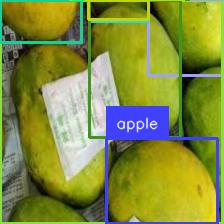

In [ ]:
html_out = ""
for image, _, caption in make_predictions(validation_data_iterator(), num_examples=4, batch_size=4):
  html_out += render_example(image, caption)
display(HTML(html_out))

step:  1/64   lr: 0.00083   loss: 6.2251
step:  2/64   lr: 0.00167   loss: 5.2393
step:  3/64   lr: 0.00250   loss: 4.1449
step:  4/64   lr: 0.00333   loss: 3.9868
step:  5/64   lr: 0.00417   loss: 3.9213
step:  6/64   lr: 0.00500   loss: 3.9188
step:  7/64   lr: 0.00500   loss: 3.9145
step:  8/64   lr: 0.00499   loss: 3.7533
Model predictions at step 8



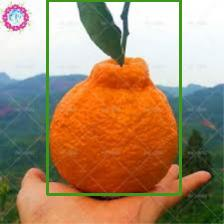
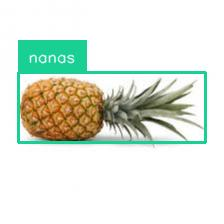
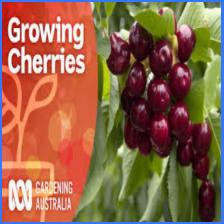
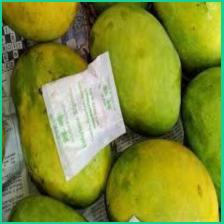

step:  9/64   lr: 0.00497   loss: 3.6801
step: 10/64   lr: 0.00494   loss: 2.9615
step: 11/64   lr: 0.00491   loss: 3.3939
step: 12/64   lr: 0.00487   loss: 3.1788
step: 13/64   lr: 0.00483   loss: 3.0099
step: 14/64   lr: 0.00478   loss: 3.2106
step: 15/64   lr: 0.00472   loss: 2.8662
step: 16/64   lr: 0.00465   loss: 3.1641
Model predictions at step 16



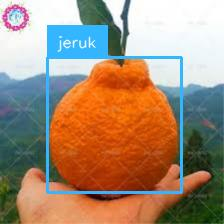
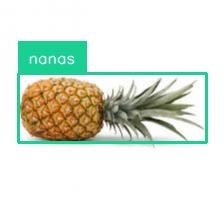
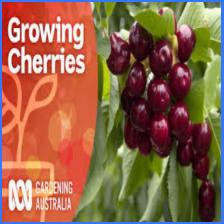
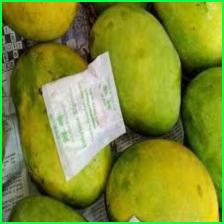

step: 17/64   lr: 0.00458   loss: 3.6762
step: 18/64   lr: 0.00451   loss: 3.1386
step: 19/64   lr: 0.00442   loss: 3.1543
step: 20/64   lr: 0.00434   loss: 3.0087
step: 21/64   lr: 0.00424   loss: 2.7988
step: 22/64   lr: 0.00415   loss: 3.2173
step: 23/64   lr: 0.00404   loss: 3.0489
step: 24/64   lr: 0.00394   loss: 3.0280
Model predictions at step 24



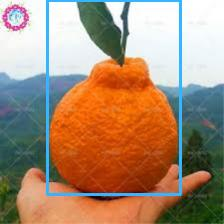
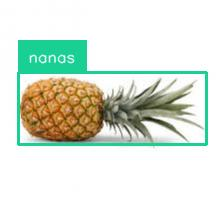
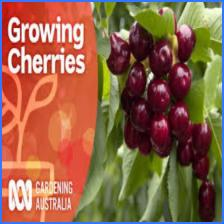
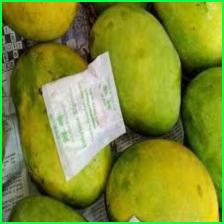

step: 25/64   lr: 0.00383   loss: 3.2069
step: 26/64   lr: 0.00371   loss: 3.0888
step: 27/64   lr: 0.00359   loss: 3.3573
step: 28/64   lr: 0.00347   loss: 3.1112
step: 29/64   lr: 0.00335   loss: 2.9765
step: 30/64   lr: 0.00322   loss: 3.0744
step: 31/64   lr: 0.00309   loss: 3.4124
step: 32/64   lr: 0.00296   loss: 3.0235
Model predictions at step 32



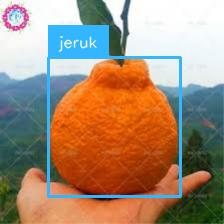
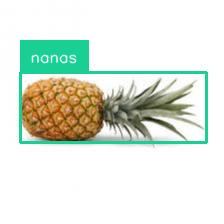
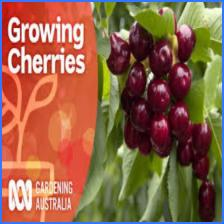
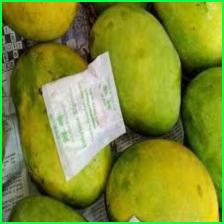

step: 33/64   lr: 0.00283   loss: 2.6149
step: 34/64   lr: 0.00270   loss: 2.7729
step: 35/64   lr: 0.00257   loss: 2.9006
step: 36/64   lr: 0.00243   loss: 2.8123
step: 37/64   lr: 0.00230   loss: 3.1307
step: 38/64   lr: 0.00217   loss: 3.2318
step: 39/64   lr: 0.00204   loss: 2.6941
step: 40/64   lr: 0.00191   loss: 2.8310
Model predictions at step 40



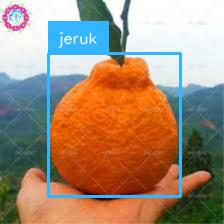
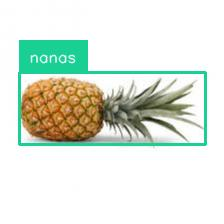
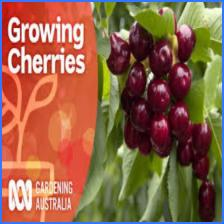
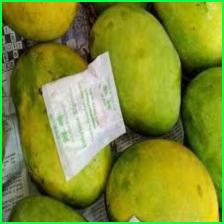

step: 41/64   lr: 0.00178   loss: 2.7860
step: 42/64   lr: 0.00165   loss: 3.1203
step: 43/64   lr: 0.00153   loss: 2.9127
step: 44/64   lr: 0.00141   loss: 2.8439
step: 45/64   lr: 0.00129   loss: 3.1527
step: 46/64   lr: 0.00117   loss: 3.0606
step: 47/64   lr: 0.00106   loss: 2.9118
step: 48/64   lr: 0.00096   loss: 3.0188
Model predictions at step 48



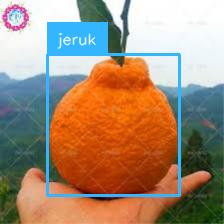
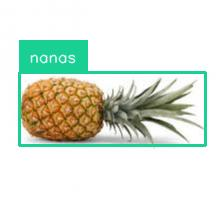
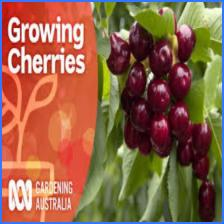
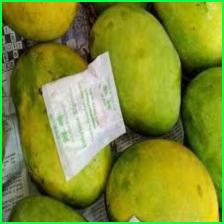

step: 49/64   lr: 0.00085   loss: 2.8435
step: 50/64   lr: 0.00076   loss: 2.9953
step: 51/64   lr: 0.00066   loss: 3.0308
step: 52/64   lr: 0.00058   loss: 3.0073
step: 53/64   lr: 0.00049   loss: 2.6529
step: 54/64   lr: 0.00042   loss: 2.8936
step: 55/64   lr: 0.00035   loss: 3.3992
step: 56/64   lr: 0.00028   loss: 2.9792
Model predictions at step 56



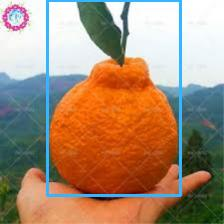
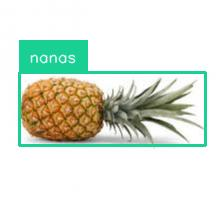
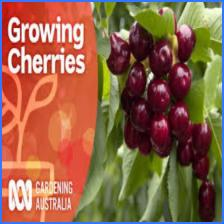
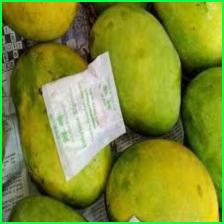

step: 57/64   lr: 0.00022   loss: 3.0841
step: 58/64   lr: 0.00017   loss: 2.7414
step: 59/64   lr: 0.00013   loss: 2.8593
step: 60/64   lr: 0.00009   loss: 3.2225
step: 61/64   lr: 0.00006   loss: 3.0910
step: 62/64   lr: 0.00003   loss: 2.9318
step: 63/64   lr: 0.00001   loss: 3.2402
step: 64/64   lr: 0.00000   loss: 2.8319
Model predictions at step 64



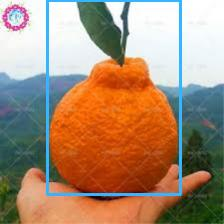
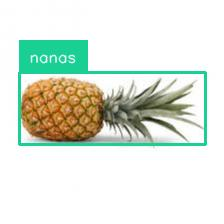
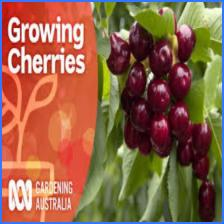
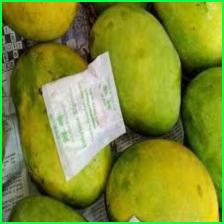

CPU times: user 11min 52s, sys: 575 ms, total: 11min 52s
Wall time: 12min 5s


In [ ]:
# # Run a short training loop with cosine learning rate schedule.
# #
# # Note: the first step can be quite slow on some machines (up to several minutes)
# # due to XLA compilation of the jax.jit'd function.
# #
# %%time

# BATCH_SIZE = 8
# TRAIN_EXAMPLES = 512
# LEARNING_RATE = 0.005

# TRAIN_STEPS = TRAIN_EXAMPLES // BATCH_SIZE
# EVAL_STEPS = TRAIN_STEPS // 8

# train_data_it = train_data_iterator()

# sched_fn = big_vision.utils.create_learning_rate_schedule(
#     total_steps=TRAIN_STEPS+1, base=LEARNING_RATE,
#     decay_type="cosine", warmup_percent=0.10)

# for step in range(1, TRAIN_STEPS+1):
#   # Make list of N training examples.
#   examples = [next(train_data_it) for _ in range(BATCH_SIZE)]

#   # Convert list of examples into a dict of np.arrays and load onto devices.
#   batch = jax.tree.map(lambda *x: np.stack(x), *examples)
#   batch = big_vision.utils.reshard(batch, data_sharding)

#   # Training step and report training loss
#   learning_rate = sched_fn(step)
#   params, loss = update_fn(params, batch, learning_rate)

#   loss = jax.device_get(loss)
#   print(f"step: {step:2d}/{TRAIN_STEPS:2d}   lr: {learning_rate:.5f}   loss: {loss:.4f}")

#   if (step % EVAL_STEPS) == 0:
#     print(f"Model predictions at step {step}")
#     html_out = ""
#     for image, _, caption in make_predictions(
#         validation_data_iterator(), num_examples=4, batch_size=4):
#       html_out += render_example(image, caption)
#     display(HTML(html_out))


In [ ]:
print(train_data_iterator())

<generator object train_data_iterator at 0x78fe1831eea0>


step:  1/128   lr: 0.00038   loss: 2.9596
step:  2/128   lr: 0.00077   loss: 3.1972
step:  3/128   lr: 0.00115   loss: 3.2467
step:  4/128   lr: 0.00154   loss: 3.0009
step:  5/128   lr: 0.00192   loss: 3.2530
step:  6/128   lr: 0.00231   loss: 3.2058
step:  7/128   lr: 0.00269   loss: 3.2357
step:  8/128   lr: 0.00308   loss: 3.0499
step:  9/128   lr: 0.00346   loss: 2.6528
step: 10/128   lr: 0.00385   loss: 3.2102
step: 11/128   lr: 0.00423   loss: 2.8515
step: 12/128   lr: 0.00462   loss: 3.1519
step: 13/128   lr: 0.00500   loss: 3.0391
step: 14/128   lr: 0.00500   loss: 3.0455
step: 15/128   lr: 0.00500   loss: 2.9855
step: 16/128   lr: 0.00499   loss: 3.2969
Model predictions at step 16



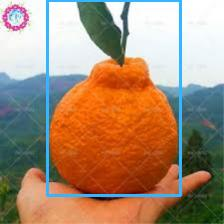
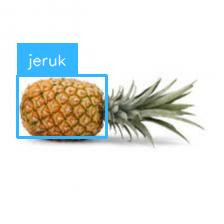
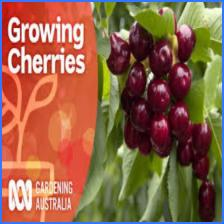
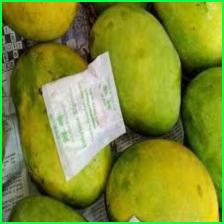

step: 17/128   lr: 0.00499   loss: 3.0626
step: 18/128   lr: 0.00498   loss: 3.0117
step: 19/128   lr: 0.00497   loss: 3.1435
step: 20/128   lr: 0.00496   loss: 3.0722
step: 21/128   lr: 0.00494   loss: 2.7608
step: 22/128   lr: 0.00493   loss: 2.6515
step: 23/128   lr: 0.00491   loss: 2.7423
step: 24/128   lr: 0.00489   loss: 3.5289
step: 25/128   lr: 0.00487   loss: 2.9077
step: 26/128   lr: 0.00485   loss: 3.0044
step: 27/128   lr: 0.00482   loss: 2.8462
step: 28/128   lr: 0.00480   loss: 2.8474
step: 29/128   lr: 0.00477   loss: 3.1003
step: 30/128   lr: 0.00474   loss: 2.9342
step: 31/128   lr: 0.00471   loss: 3.1489
step: 32/128   lr: 0.00468   loss: 3.0064
Model predictions at step 32



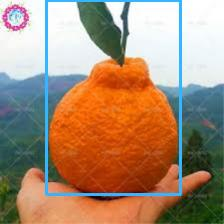
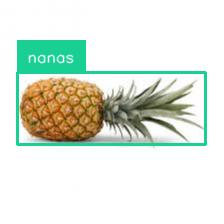
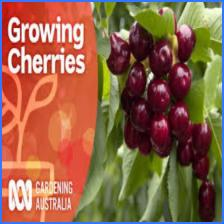
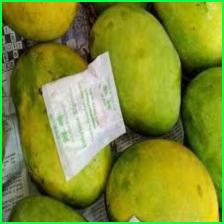

step: 33/128   lr: 0.00464   loss: 3.3332
step: 34/128   lr: 0.00461   loss: 3.1923
step: 35/128   lr: 0.00457   loss: 3.3960
step: 36/128   lr: 0.00453   loss: 3.1756
step: 37/128   lr: 0.00449   loss: 4.4010
step: 38/128   lr: 0.00445   loss: 3.1992
step: 39/128   lr: 0.00441   loss: 3.2838
step: 40/128   lr: 0.00436   loss: 3.1945
step: 41/128   lr: 0.00431   loss: 2.9446
step: 42/128   lr: 0.00427   loss: 2.8445
step: 43/128   lr: 0.00422   loss: 2.9692
step: 44/128   lr: 0.00417   loss: 2.7099
step: 45/128   lr: 0.00412   loss: 3.0774
step: 46/128   lr: 0.00407   loss: 3.2015
step: 47/128   lr: 0.00401   loss: 2.7082
step: 48/128   lr: 0.00396   loss: 2.9812
Model predictions at step 48



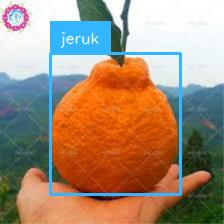
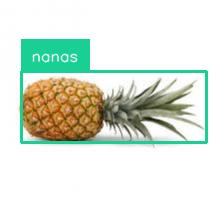
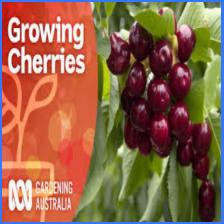
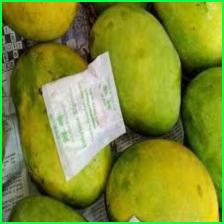

step: 49/128   lr: 0.00390   loss: 3.0466
step: 50/128   lr: 0.00385   loss: 2.8799
step: 51/128   lr: 0.00379   loss: 3.4739
step: 52/128   lr: 0.00373   loss: 3.0713
step: 53/128   lr: 0.00367   loss: 3.2998
step: 54/128   lr: 0.00361   loss: 3.2376
step: 55/128   lr: 0.00355   loss: 3.1430
step: 56/128   lr: 0.00349   loss: 2.8819
step: 57/128   lr: 0.00343   loss: 3.3055
step: 58/128   lr: 0.00336   loss: 2.7408
step: 59/128   lr: 0.00330   loss: 3.2850
step: 60/128   lr: 0.00323   loss: 2.7296
step: 61/128   lr: 0.00317   loss: 3.4169
step: 62/128   lr: 0.00310   loss: 2.9018
step: 63/128   lr: 0.00304   loss: 2.9142
step: 64/128   lr: 0.00297   loss: 3.1045
Model predictions at step 64



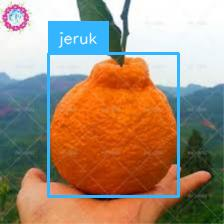
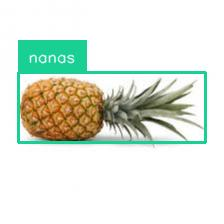
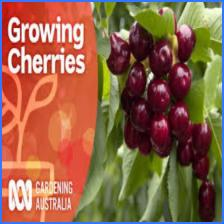
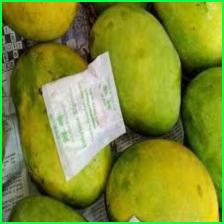

step: 65/128   lr: 0.00290   loss: 3.0017
step: 66/128   lr: 0.00284   loss: 2.7888
step: 67/128   lr: 0.00277   loss: 3.1139
step: 68/128   lr: 0.00270   loss: 2.5749
step: 69/128   lr: 0.00264   loss: 2.4916
step: 70/128   lr: 0.00257   loss: 3.0069
step: 71/128   lr: 0.00250   loss: 3.8925
step: 72/128   lr: 0.00243   loss: 2.8189
step: 73/128   lr: 0.00236   loss: 3.0000
step: 74/128   lr: 0.00230   loss: 3.2819
step: 75/128   lr: 0.00223   loss: 2.9416
step: 76/128   lr: 0.00216   loss: 4.1739
step: 77/128   lr: 0.00210   loss: 2.2429
step: 78/128   lr: 0.00203   loss: 2.9534
step: 79/128   lr: 0.00196   loss: 3.3918
step: 80/128   lr: 0.00190   loss: 2.9913
Model predictions at step 80



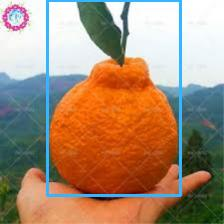
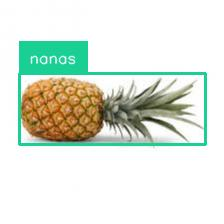
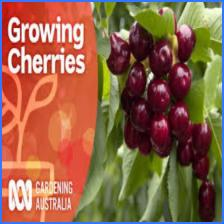
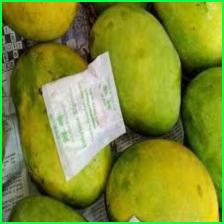

step: 81/128   lr: 0.00183   loss: 2.5711
step: 82/128   lr: 0.00177   loss: 2.7569
step: 83/128   lr: 0.00170   loss: 2.8182
step: 84/128   lr: 0.00164   loss: 3.0144
step: 85/128   lr: 0.00157   loss: 2.6003
step: 86/128   lr: 0.00151   loss: 2.8064
step: 87/128   lr: 0.00145   loss: 2.5833
step: 88/128   lr: 0.00139   loss: 3.7174
step: 89/128   lr: 0.00133   loss: 3.4820
step: 90/128   lr: 0.00127   loss: 2.7415
step: 91/128   lr: 0.00121   loss: 2.4891
step: 92/128   lr: 0.00115   loss: 2.9010
step: 93/128   lr: 0.00110   loss: 3.0275
step: 94/128   lr: 0.00104   loss: 3.0974
step: 95/128   lr: 0.00099   loss: 2.9177
step: 96/128   lr: 0.00093   loss: 3.6868
Model predictions at step 96



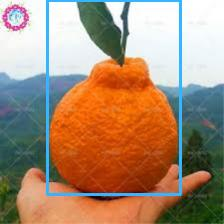
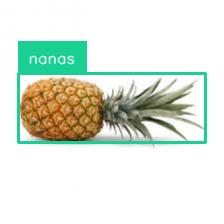
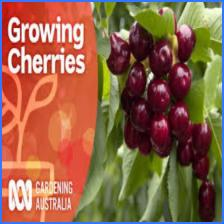
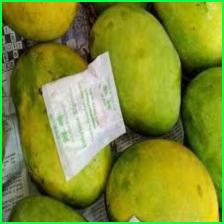

step: 97/128   lr: 0.00088   loss: 2.9106
step: 98/128   lr: 0.00083   loss: 2.7509
step: 99/128   lr: 0.00078   loss: 2.9657
step: 100/128   lr: 0.00073   loss: 2.8592
step: 101/128   lr: 0.00069   loss: 3.5038
step: 102/128   lr: 0.00064   loss: 2.9603
step: 103/128   lr: 0.00059   loss: 3.0077
step: 104/128   lr: 0.00055   loss: 2.5842
step: 105/128   lr: 0.00051   loss: 3.0905
step: 106/128   lr: 0.00047   loss: 3.2901
step: 107/128   lr: 0.00043   loss: 2.7352
step: 108/128   lr: 0.00039   loss: 3.5116
step: 109/128   lr: 0.00036   loss: 3.1003
step: 110/128   lr: 0.00032   loss: 2.8047
step: 111/128   lr: 0.00029   loss: 2.6562
step: 112/128   lr: 0.00026   loss: 2.8727
Model predictions at step 112



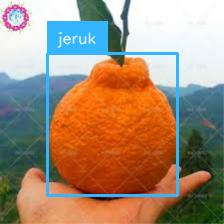
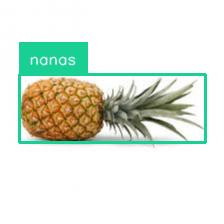
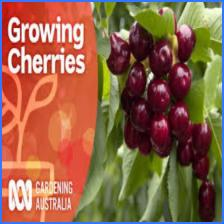
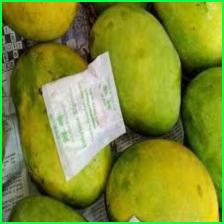

step: 113/128   lr: 0.00023   loss: 2.7427
step: 114/128   lr: 0.00020   loss: 3.1973
step: 115/128   lr: 0.00018   loss: 3.0707
step: 116/128   lr: 0.00015   loss: 3.0791
step: 117/128   lr: 0.00013   loss: 2.9640
step: 118/128   lr: 0.00011   loss: 3.1341
step: 119/128   lr: 0.00009   loss: 2.6782
step: 120/128   lr: 0.00007   loss: 2.7562
step: 121/128   lr: 0.00006   loss: 2.8521
step: 122/128   lr: 0.00004   loss: 2.9559
step: 123/128   lr: 0.00003   loss: 2.5813
step: 124/128   lr: 0.00002   loss: 2.7917
step: 125/128   lr: 0.00001   loss: 3.5269
step: 126/128   lr: 0.00001   loss: 2.9311
step: 127/128   lr: 0.00000   loss: 2.7163
step: 128/128   lr: 0.00000   loss: 3.0681
Model predictions at step 128



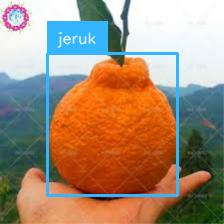
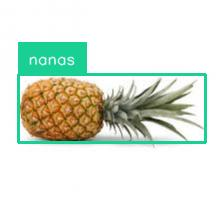
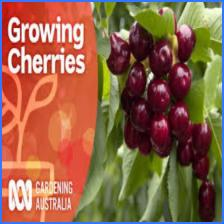
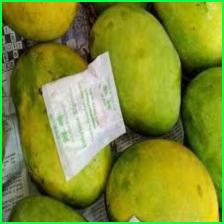

CPU times: user 11min 54s, sys: 1.09 s, total: 11min 55s
Wall time: 12min 12s


In [ ]:
# Run a short training loop with cosine learning rate schedule.
#
# Note: the first step can be quite slow on some machines (up to several minutes)
# due to XLA compilation of the jax.jit'd function.
#
%%time

BATCH_SIZE = 4
TRAIN_EXAMPLES = 512
LEARNING_RATE = 0.005

TRAIN_STEPS = TRAIN_EXAMPLES // BATCH_SIZE
EVAL_STEPS = TRAIN_STEPS // 8

train_data_it = train_data_iterator()

sched_fn = big_vision.utils.create_learning_rate_schedule(
    total_steps=TRAIN_STEPS+1, base=LEARNING_RATE,
    decay_type="cosine", warmup_percent=0.10)

for step in range(1, TRAIN_STEPS+1):
  # Make list of N training examples.
  examples = [next(train_data_it) for _ in range(BATCH_SIZE)]

  # Convert list of examples into a dict of np.arrays and load onto devices.
  batch = jax.tree.map(lambda *x: np.stack(x), *examples)
  batch = big_vision.utils.reshard(batch, data_sharding)

  # Training step and report training loss
  learning_rate = sched_fn(step)
  params, loss = update_fn(params, batch, learning_rate)

  loss = jax.device_get(loss)
  print(f"step: {step:2d}/{TRAIN_STEPS:2d}   lr: {learning_rate:.5f}   loss: {loss:.4f}")

  if (step % EVAL_STEPS) == 0:
    print(f"Model predictions at step {step}")
    html_out = ""
    for image, _, caption in make_predictions(
        validation_data_iterator(), num_examples=4, batch_size=4):
      html_out += render_example(image, caption)
    display(HTML(html_out))



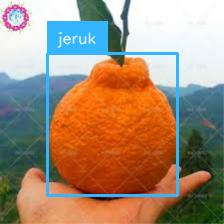
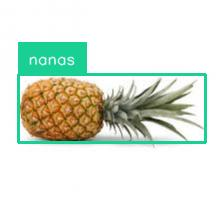
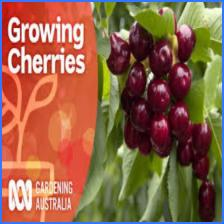
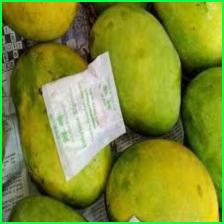
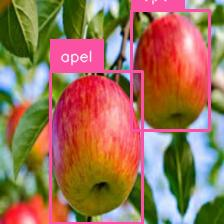
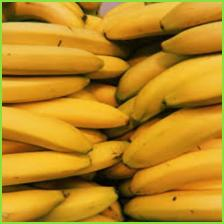
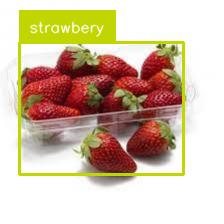
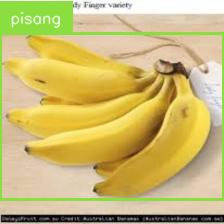
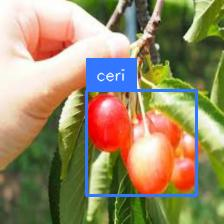
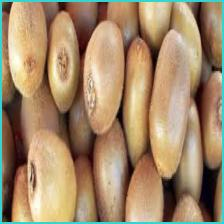
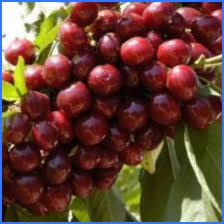
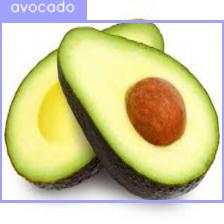
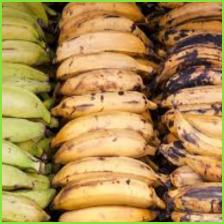
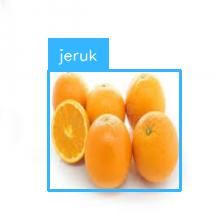
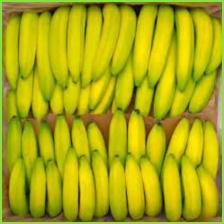
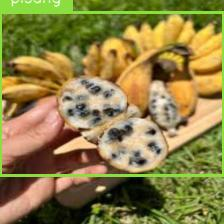

In [ ]:
# @title Visualize results
html_out = ""
for image, _, caption in make_predictions(validation_data_iterator(), num_examples=16, batch_size=8):
  html_out += render_example(image, caption)
display(HTML(html_out))

In [ ]:
# @title Collect predictions
targets = []
predictions = []

for image, label, prediction in make_predictions(validation_data_iterator(), num_examples=512, batch_size=8):
    h, w, _ = image.shape
    target = sv.Detections.from_lmm(
        lmm='paligemma',
        result=label,
        resolution_wh=(w, h),
        classes=CLASSES)
    targets.append(target)
    prediction = sv.Detections.from_lmm(
        lmm='paligemma',
        result=prediction,
        resolution_wh=(w, h),
        classes=CLASSES)
    prediction.confidence = np.ones(len(prediction))
    predictions.append(prediction)

In [ ]:
# @title Calculate mAP
mean_average_precision = sv.MeanAveragePrecision.from_detections(
    predictions=predictions,
    targets=targets,
)

print(f"map50_95: {mean_average_precision.map50_95:.2f}")
print(f"map50: {mean_average_precision.map50:.2f}")
print(f"map75: {mean_average_precision.map75:.2f}")

map50_95: 0.28
map50: 0.45
map75: 0.31


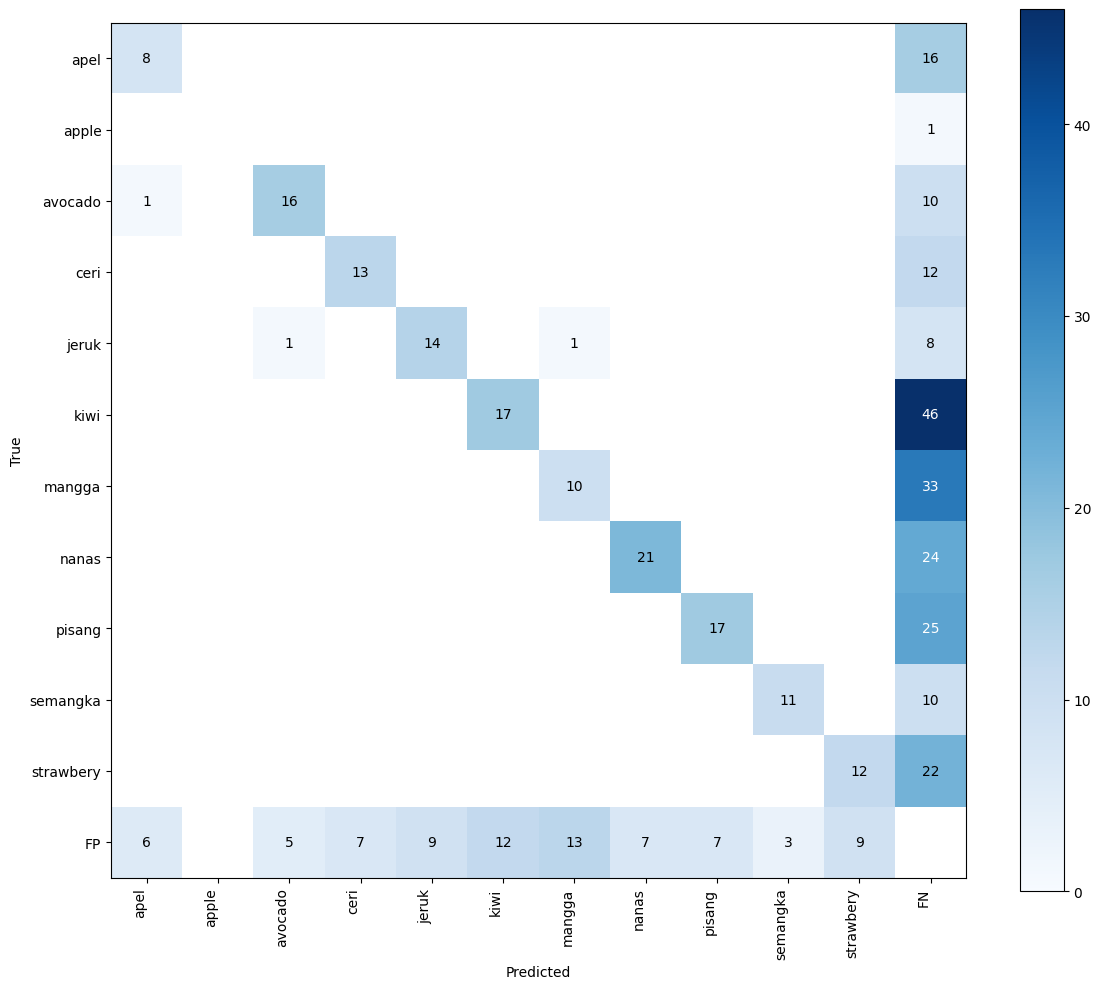

In [ ]:
# @title Calculate Confusion Matrix
confusion_matrix = sv.ConfusionMatrix.from_detections(
    predictions=predictions,
    targets=targets,
    classes=CLASSES
)

_ = confusion_matrix.plot()